# Explore here

In [50]:
# Your code here

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy._core.defchararray import upper
from scipy.stats import chi2_contingency
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import json
import pickle
import os
from pickle import dump

import warnings
def warn(*args, **kwargs):
    pass
warnings.warn = warn


# Recopilación de datos

In [52]:
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep = ";")
Raw_data= total_data.copy()
Raw_data.to_excel("/workspaces/Marcos-J-Gomes_machine-learning-python-template_2/data/raw/Raw_data.xlsx", index = False)

In [53]:
print(total_data.head())
dict = {}
for colum in total_data:
    valores_unicos = total_data[colum].unique()
    dict[colum] = total_data[colum].unique().tolist()
    dict[colum] = sorted(valores_unicos)

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

# Definicion de variables

age= Edad del cliente (numérico)  
job= Tipo de trabajo (categórico)  
marital= Estado civil (categórico)  
education= Nivel de educación (categórico)  
default= ¿Tiene crédito actualmente? (categórico)  
housing= ¿Tiene un préstamo de vivienda? (categórico)  
loan= ¿Tiene un préstamo personal? (categórico)  
contact= Tipo de comunicación de contacto (categórico)  
month= Último mes en el que se le ha contactado (categórico)  
day_of_week= Último día en el que se le ha contactado (categórico)  
duration= Duración del contacto previo en segundos (numérico)  
campaign= Número de contactos realizados durante esta campaña al cliente (numérico)  
pdays= Número de días que transcurrieron desde la última campaña hasta que fue contactado (numérico)  
previous= Número de contactos realizados durante la campaña anterior al cliente (numérico)  
poutcome= Resultado de la campaña de marketing anterior (categórico)  
emp.var.rate= Tasa de variación del empleo. Indicador trimestral (numérico)  
cons.price.idx= Índice de precios al consumidor. Indicador mensual (numérico)  
cons.conf.idx= Índice de confianza del consumidor. Indicador mensual (numérico)  
euribor3m= Tasa EURIBOR 3 meses. Indicador diario (numérico)  
nr.employed= Número de empleados. Indicador trimestral (numérico)  
y= TARGET. El cliente contrata un depósito a largo plazo o no (categórico)  

In [54]:
print(total_data.shape)
print(total_data.info())

(41188, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   411

# PRIMERAS CONCLUSIONES:  

-Tenemos un total de 41.188 filas y 21 columnas  
-No observamos a simple vista valores nulos  
-Los datos se distribuyen de la siguiente:  
    -- 10 caracteristicas numericas: age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed  
    -- 11 caracteristicas categoricas: job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome, y

# DUPLICADOS  

In [55]:
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# ANALISIS UNIVARIANTE: CATEGORICAS

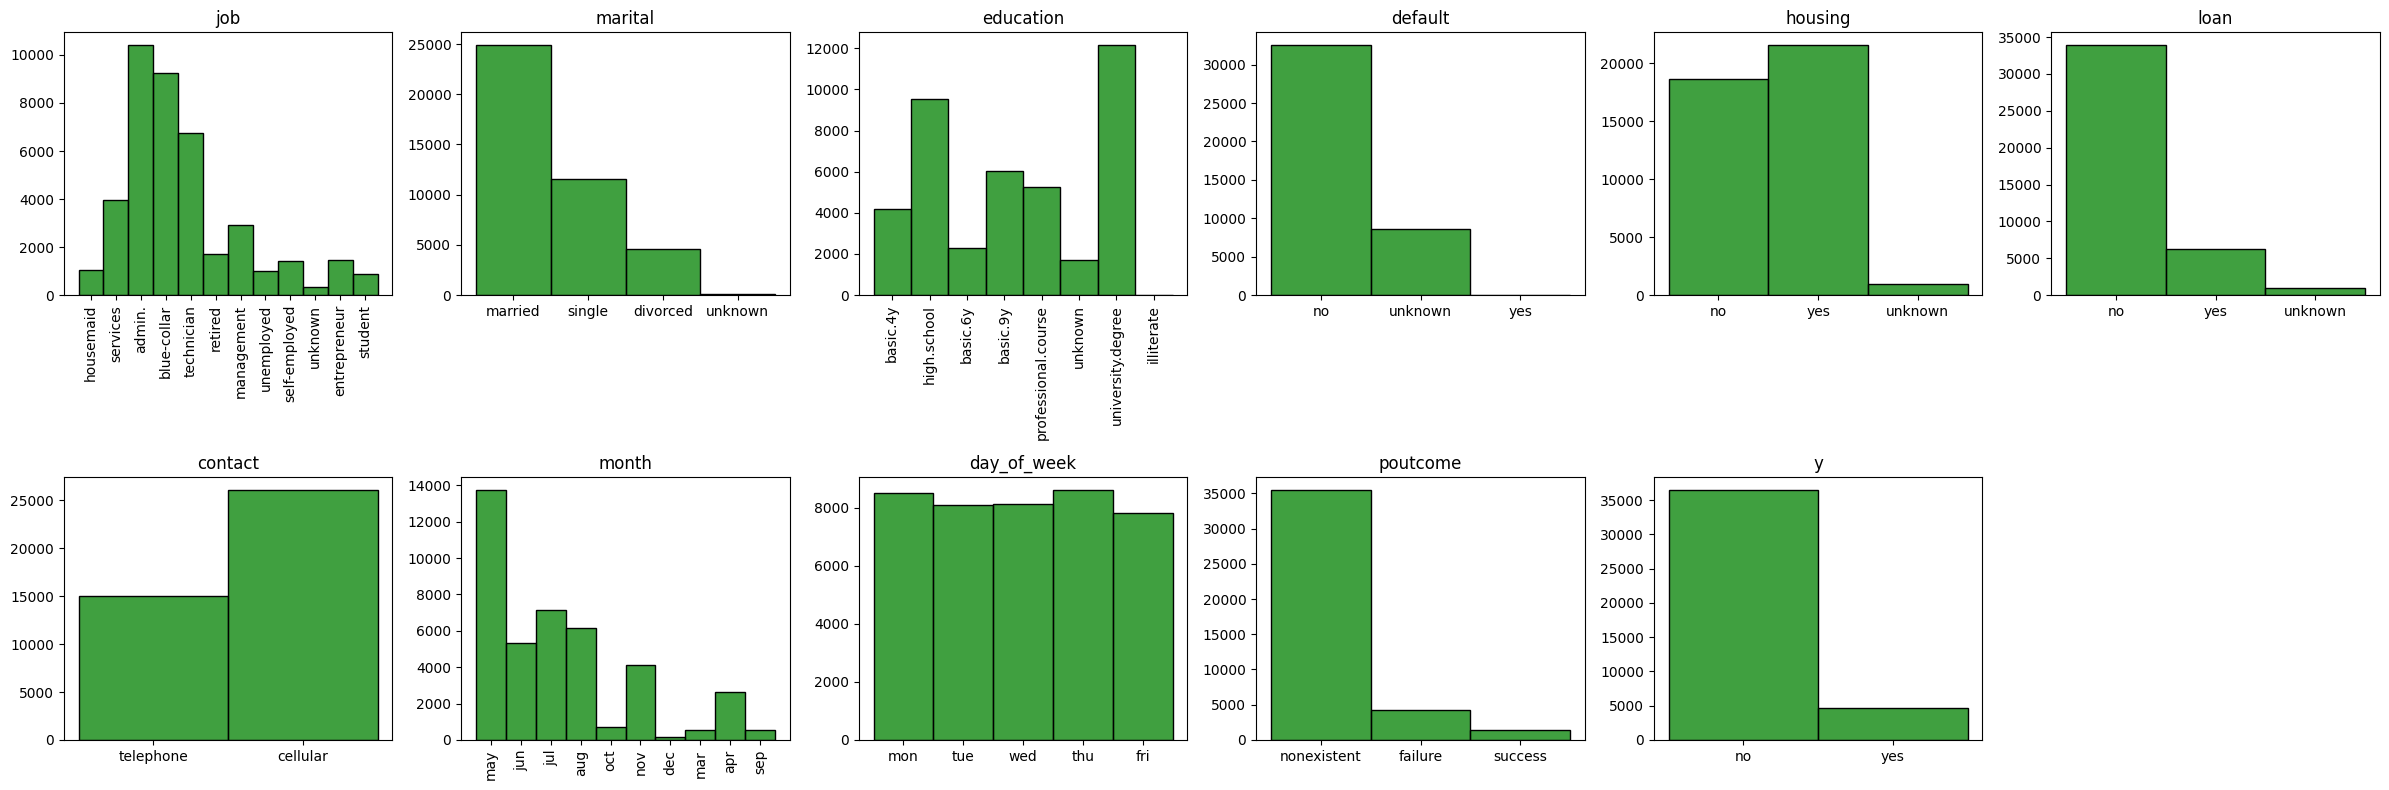

In [56]:
Col_categoricas = ['job', 'marital',"education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome", "y"]
fig, axis = plt.subplots(2, 6, figsize=(24, 8))
axis = axis.flatten()  

for i, col in enumerate(Col_categoricas): 
    sns.histplot(data=total_data, x=col, ax=axis[i], color="green")
    axis[i].set_title(col)
    axis[i].set_xlabel(None)
    axis[i].set_ylabel(None)

    if total_data[col].nunique() > 7:   
        axis[i].tick_params(axis="x", rotation=90)

for j in range(len(Col_categoricas), len(axis)):
    fig.delaxes(axis[j])
    
plt.tight_layout()
plt.show()


- El top de "job" en nuestro data set seria Admin, Blue-collar y Technician, por lo que no notamos un patron a seguir, al menos de momento
- La mayoria de los datos vienen de personas casadas (married), esto se puede entender ya que al ser 2 puede facilitar la carga de un prestamo
- Con los datos de "education" podemos intuir que hay una relacion entre mayor sea el nivel economico con el hecho de solicitar el prestamo
- Sorprende la gran diferencia positiva sobre las solicitudes en mayo comparado a otros meses.

# ANALISIS UNIVARIANTE: NUMERICO

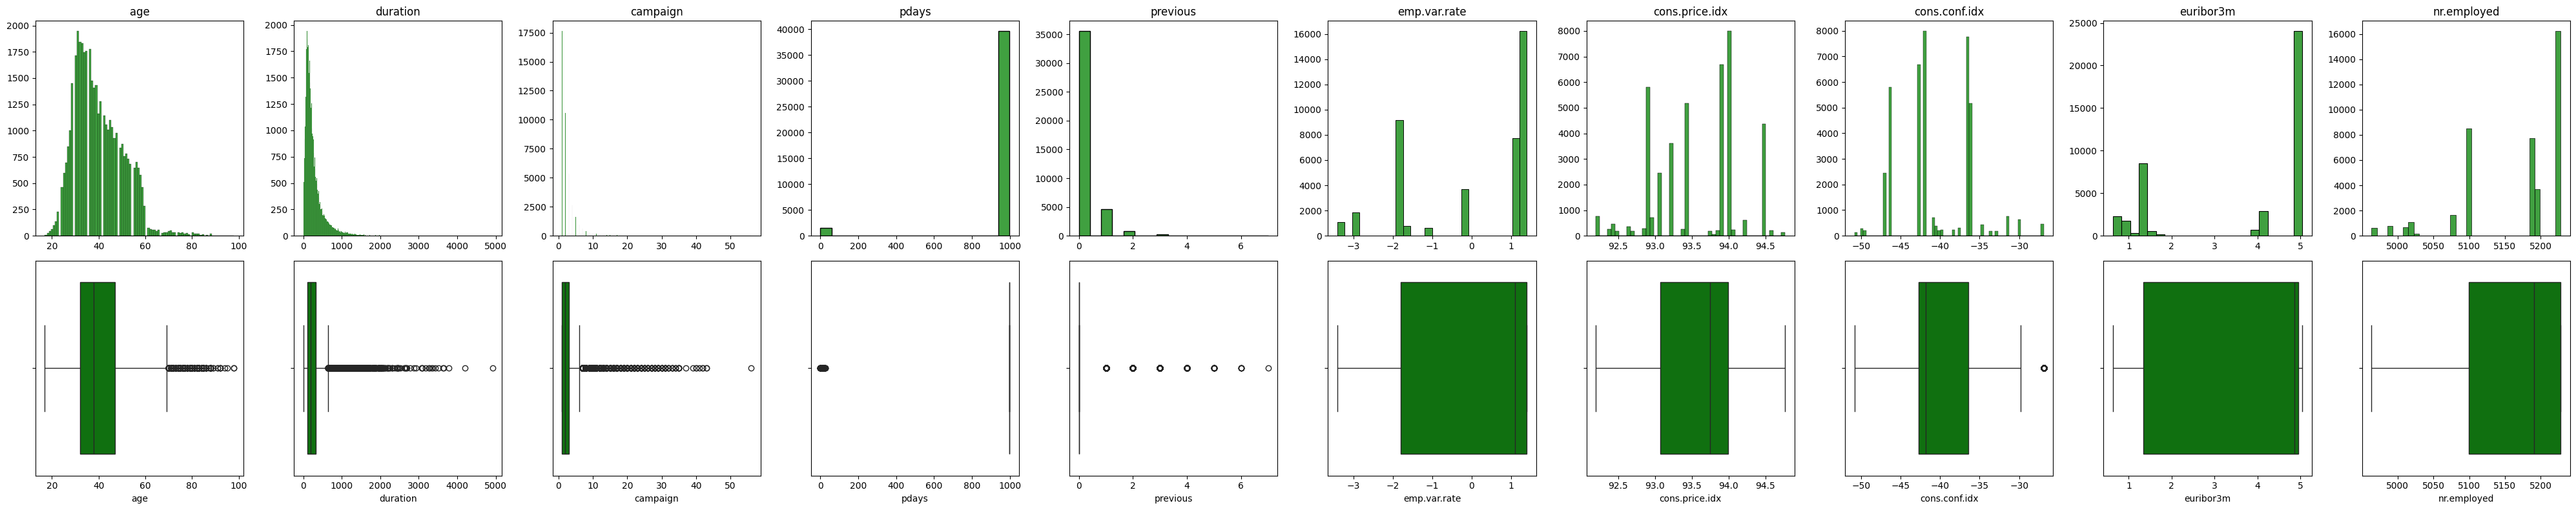

In [57]:
Col_numericas = ["age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx","euribor3m", "nr.employed"]

fig, axis = plt.subplots(2, 10, figsize=(40, 8))

for i, col in enumerate(Col_numericas):

    sns.histplot(data=total_data, x=col, ax=axis[0, i], color="green")
    axis[0, i].set_title(col)
    axis[0, i].set_xlabel(None)
    axis[0, i].set_ylabel(None)

    sns.boxplot(data=total_data, x=col, ax=axis[1, i],color="green")

for j in range(len(Col_numericas), len(axis)):
    fig.delaxes(axis[j])
    
plt.tight_layout()
plt.show()


- Podemos notar un "normalidad" en cuanto a la edad (age) en nuestros datos, lo cual era en parte esperable
- tenemos varios datos con outliers muy marcados que complican la interpretacion a primera vista como son el caso de "duration", "campaing", "previus"
- aunque en "Pdays" tenemos unos ouliers muy marcados esto se debe a que el dato es una "mezcla" entre numerico y categorico, esto debido a que el dato se captura en numero, dias que pasaron desde la ultima campaña hasta el nuevo contacto, pero, si no se logra contactar con la persona se coloca un codigo (999) para hacer referencia. Lo cual desvirtua la grafica

# ANALISIS NUMERICO-NUMERICO

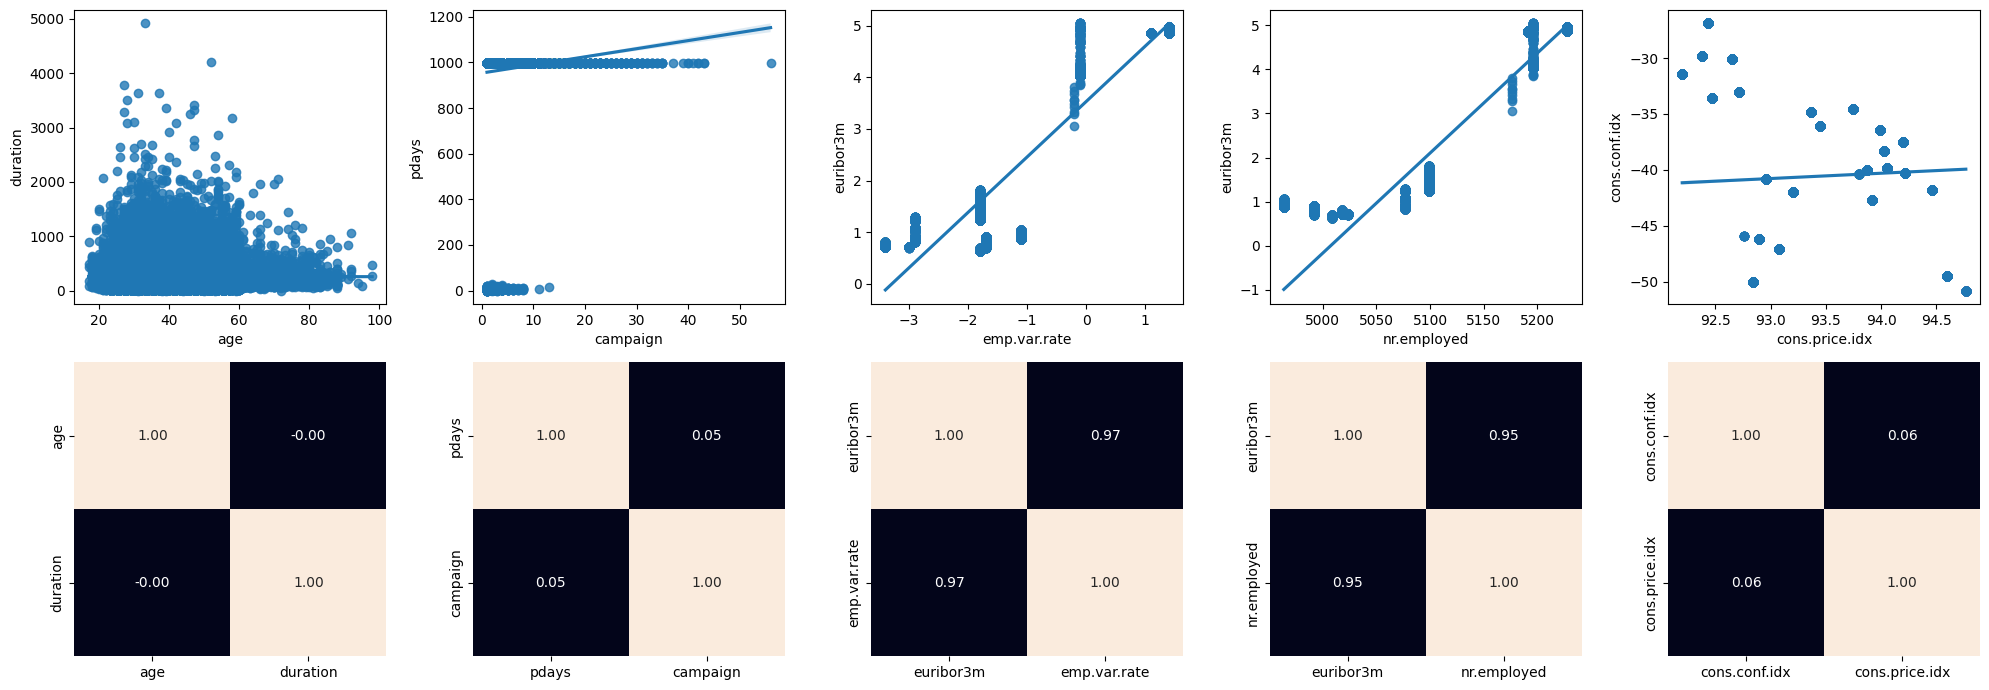

In [58]:
fig, axis = plt.subplots(2, 5, figsize = (20, 7))

sns.regplot(ax = axis[0,0], data = total_data, x = "age", y = "duration")
sns.heatmap(total_data[["age", "duration"]].corr(), annot = True, fmt = ".2f", ax = axis[1,0], cbar = False)
sns.regplot(ax = axis[0,1], data = total_data, x = "campaign", y = "pdays")
sns.heatmap(total_data[["pdays", "campaign"]].corr(), annot = True, fmt = ".2f", ax = axis[1,1], cbar = False)
sns.regplot(ax = axis[0,2], data = total_data, x = "emp.var.rate", y = "euribor3m")
sns.heatmap(total_data[["euribor3m", "emp.var.rate"]].corr(), annot = True, fmt = ".2f", ax = axis[1,2], cbar = False)
sns.regplot(ax = axis[0,3], data = total_data, x = "nr.employed", y = "euribor3m")
sns.heatmap(total_data[["euribor3m", "nr.employed"]].corr(), annot = True, fmt = ".2f", ax = axis[1,3], cbar = False)
sns.regplot(ax = axis[0,4], data = total_data, x = "cons.price.idx", y = "cons.conf.idx")
sns.heatmap(total_data[["cons.conf.idx", "cons.price.idx"]].corr(), annot = True, fmt = ".2f", ax = axis[1,4], cbar = False)


plt.tight_layout()
plt.show()

- Observamos una fuerte relacion entre las variables de Euribor3m con nr.employed y emp.var.rate, esto podria hacer que nuestras predicciones se "inclinen" de cierta manera, lo mejor seria quedarnos con una sola de las variables

# ANALISIS CATEGORICO-CATEGORICO

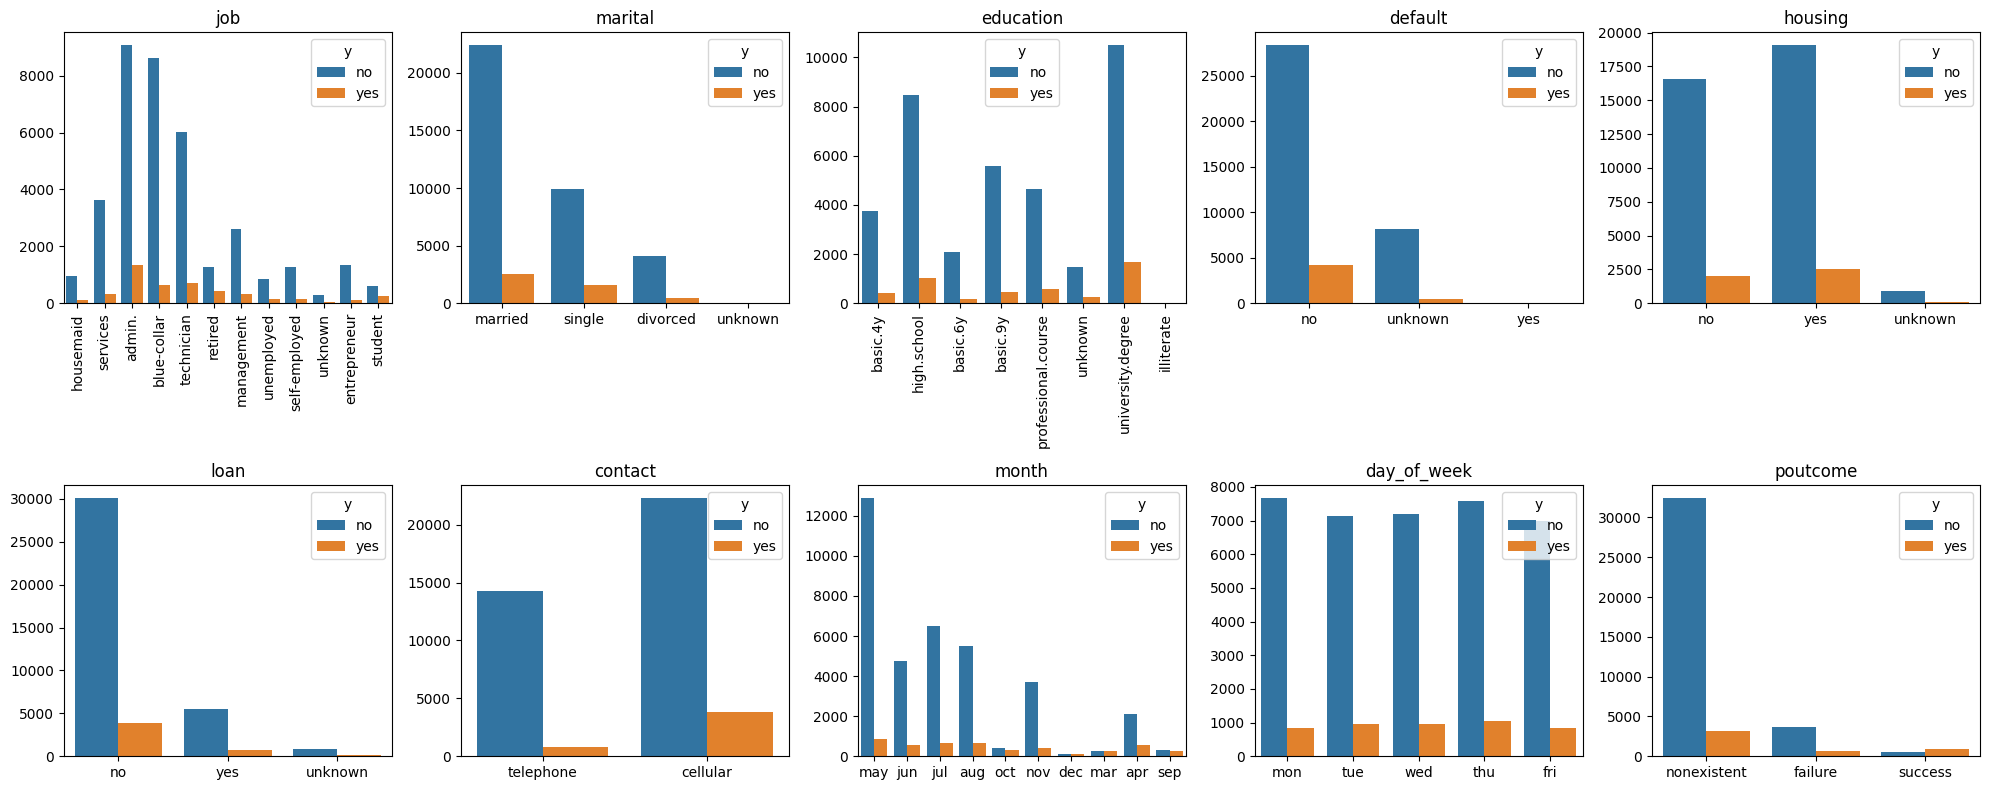

In [59]:
Col_categoricas_= ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]

fig, axis = plt.subplots(2, 5, figsize=(20, 8))
axis = axis.flatten()  

for i, col in enumerate(Col_categoricas_): 
    sns.countplot(data = total_data, x = col, hue = "y", ax=axis[i])
    axis[i].set_title(col)
    axis[i].set_xlabel("")
    axis[i].set_ylabel("")
    
    if col in ["job", "education"]:   
        axis[i].tick_params(axis="x", rotation=90)

for j in range(len(Col_categoricas), len(axis)):
    fig.delaxes(axis[j])

plt.tight_layout()
plt.show()


- no noto alguna relacion o dato que considere realmente relevante

# ANALISIS DE CORRELACION

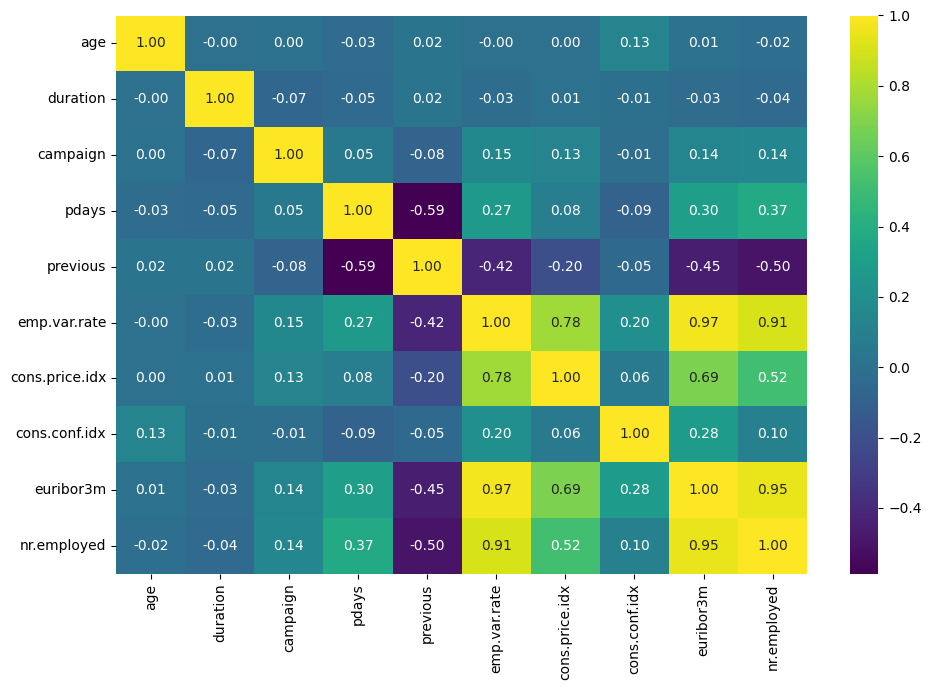

In [60]:
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(total_data[Col_numericas].corr(method="pearson"), annot=True, fmt=".2f", cmap="viridis", ax=ax)
plt.tight_layout()
plt.show()

In [61]:
Direccion_guardado = "/workspaces/Marcos-J-Gomes_machine-learning-python-template_2/data/processed"
os.makedirs(Direccion_guardado, exist_ok=True)

for col in Col_categoricas:
    # Factorizar
    total_data[f"{col}_n"], uniques = pd.factorize(total_data[col])
    
    # Crear diccionario {valor original : código numérico}
    transformation_rules = {str(val): int(code) for code, val in enumerate(uniques)}
    
    # Guardar JSON
    path = os.path.join(Direccion_guardado, f"{col}_transformation_rules.json")
    with open(path, "w") as f:
        json.dump(transformation_rules, f, indent=4)

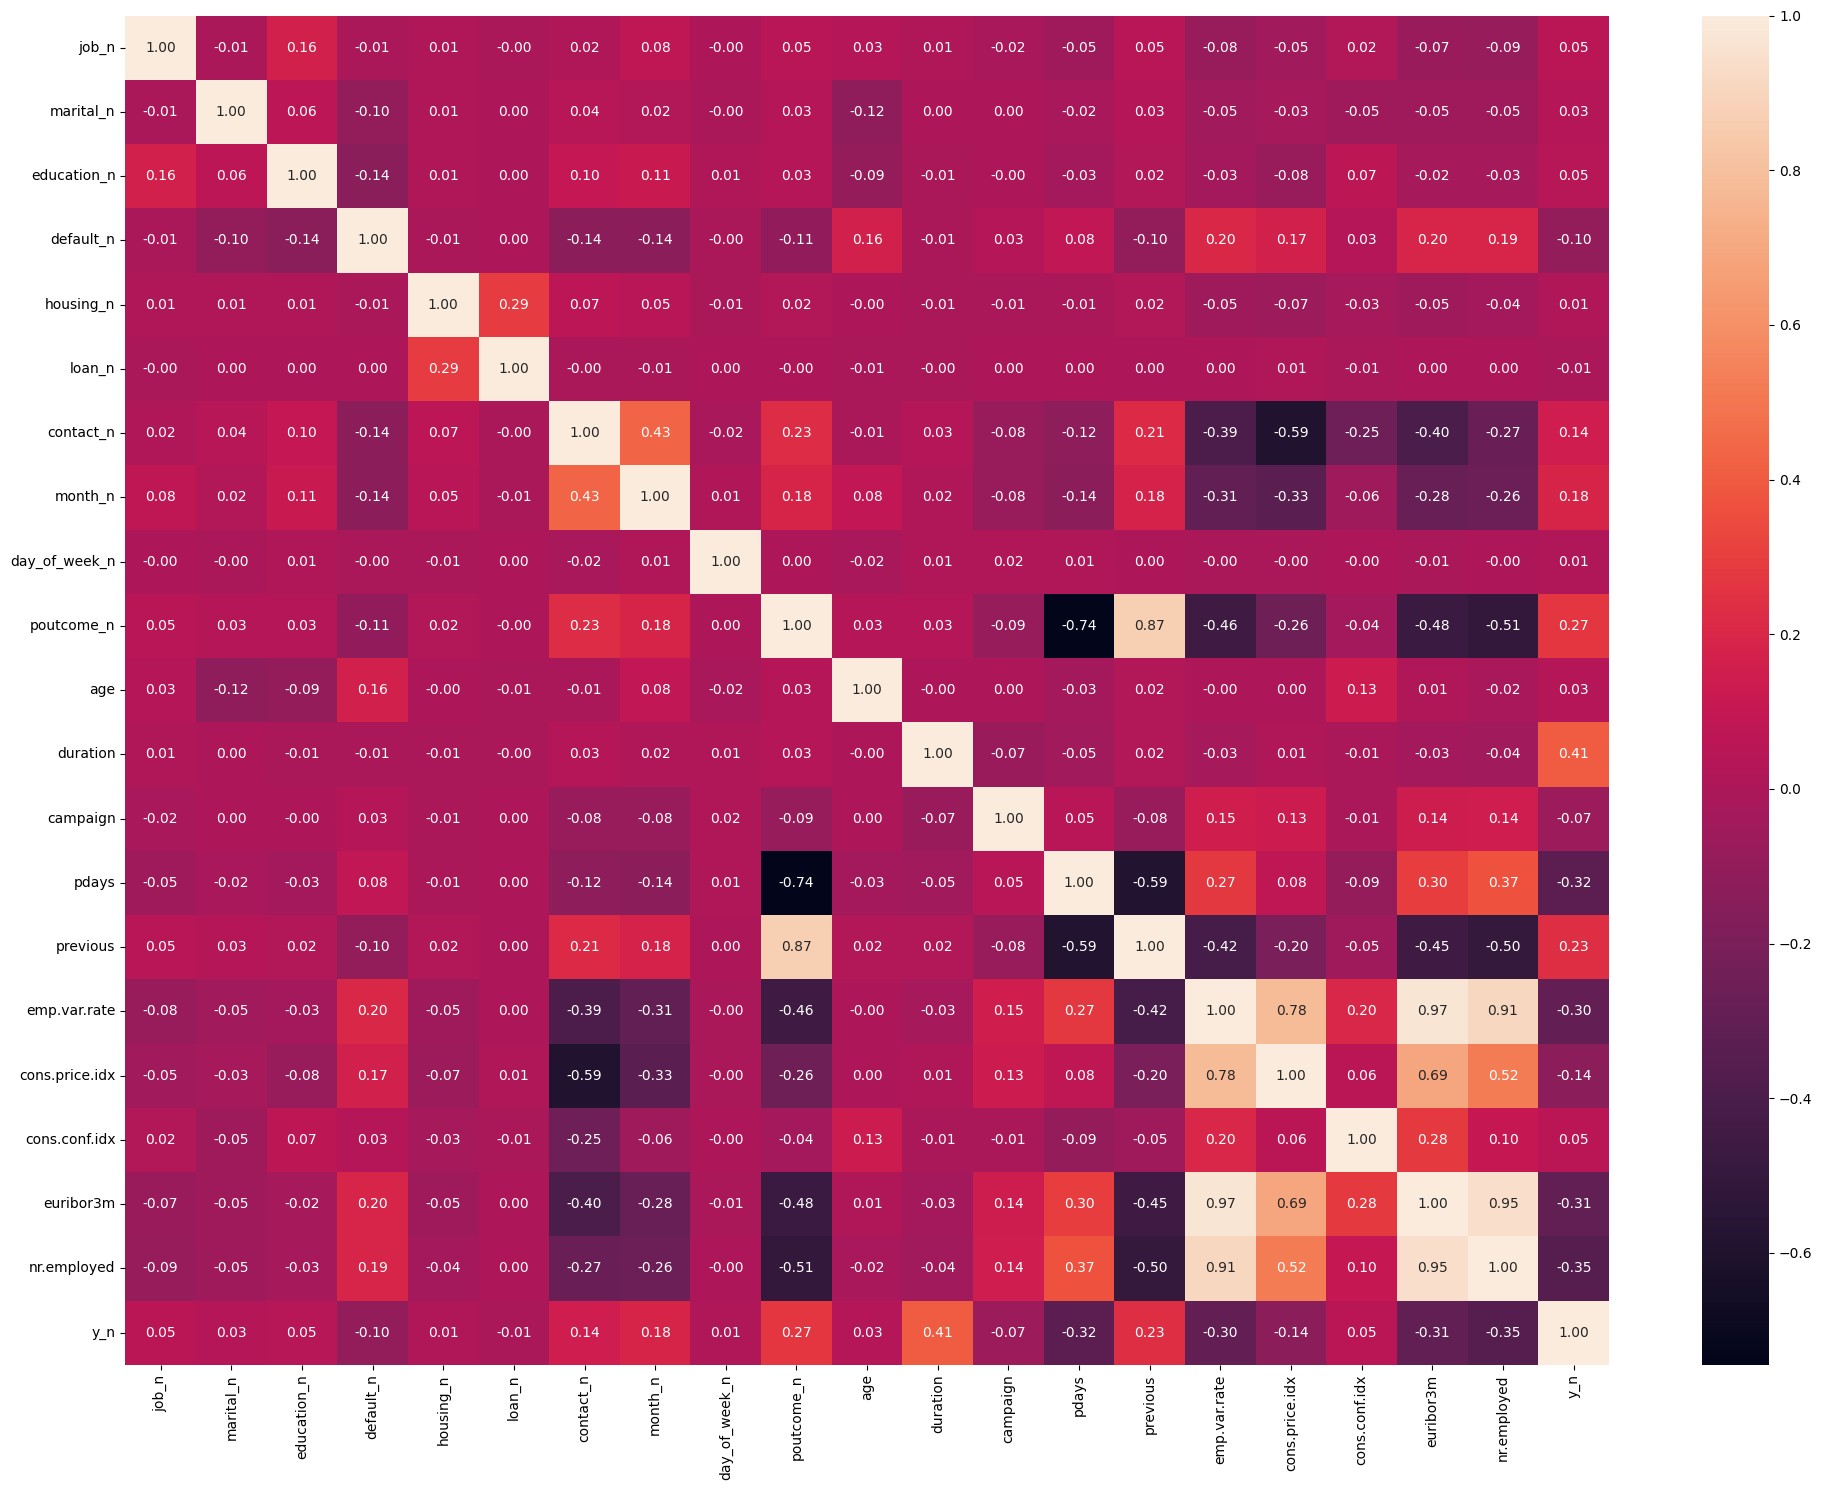

In [62]:
num_variables = ["job_n", "marital_n", "education_n", "default_n", "housing_n", "loan_n", "contact_n", "month_n", "day_of_week_n", "poutcome_n", "age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "y_n"]

fig, axes = plt.subplots(figsize=(20, 15))

sns.heatmap(total_data[num_variables].corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()

- Podemos validar la alta relación entre las variables de euribor3m con nr.employed y emp.var.rate, y su relacion similar con nuetra variable objetivo, asi que pasaremos a quedarnos solo con el dato de euribor3m ya que este es el que mantine mayor correlacion entre las 3 variable

# ANALISIS DE TODA LA DATA CONJUNTA

In [ ]:
sns.pairplot(data = total_data)

# FEATURE ENGINEERING
(Ingeniería de características)

In [ ]:
columnas_finales= ["job_n", "marital_n", "education_n", "default_n", "housing_n", "loan_n", "contact_n", "month_n", "day_of_week_n", 
                   "poutcome_n", "age", "campaign", "pdays", "previous", "cons.price.idx", "cons.conf.idx", "euribor3m", "y_n"]
 
total_data= total_data[columnas_finales]
total_data.head()

,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,age,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,y_n
0,0,0,0,0,0,0,0,0,0,0,56,1,999,0,93.994,-36.4,4.857,0
1,1,0,1,1,0,0,0,0,0,0,57,1,999,0,93.994,-36.4,4.857,0
2,1,0,1,0,1,0,0,0,0,0,37,1,999,0,93.994,-36.4,4.857,0
3,2,0,2,0,0,0,0,0,0,0,40,1,999,0,93.994,-36.4,4.857,0
4,1,0,1,0,0,1,0,0,0,0,56,1,999,0,93.994,-36.4,4.857,0


In [ ]:
total_data.describe()

,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,age,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,y_n
count,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,3.673863,0.510637,3.277370,0.208908,0.571959,0.199825,0.634714,2.249951,1.979600,0.169953,40.02380,2.567879,962.464810,0.173013,93.575720,-40.502863,3.621293,0.112663
std,2.454340,0.696794,2.185558,0.406713,0.541216,0.456055,0.481516,2.429157,1.411539,0.455811,10.42068,2.770318,186.937102,0.494964,0.578839,4.627860,1.734437,0.316184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.00000,1.000000,0.000000,0.000000,92.201000,-50.800000,0.634000,0.000000
25%,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,32.00000,1.000000,999.000000,0.000000,93.075000,-42.700000,1.344000,0.000000
50%,3.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,2.000000,2.000000,0.000000,38.00000,2.000000,999.000000,0.000000,93.749000,-41.800000,4.857000,0.000000
75%,4.000000,1.000000,6.000000,0.000000,1.000000,0.000000,1.000000,3.000000,3.000000,0.000000,47.00000,3.000000,999.000000,0.000000,93.994000,-36.400000,4.961000,0.000000
max,11.000000,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000,9.000000,4.000000,2.000000,98.00000,56.000000,999.000000,7.000000,94.767000,-26.900000,5.045000,1.000000


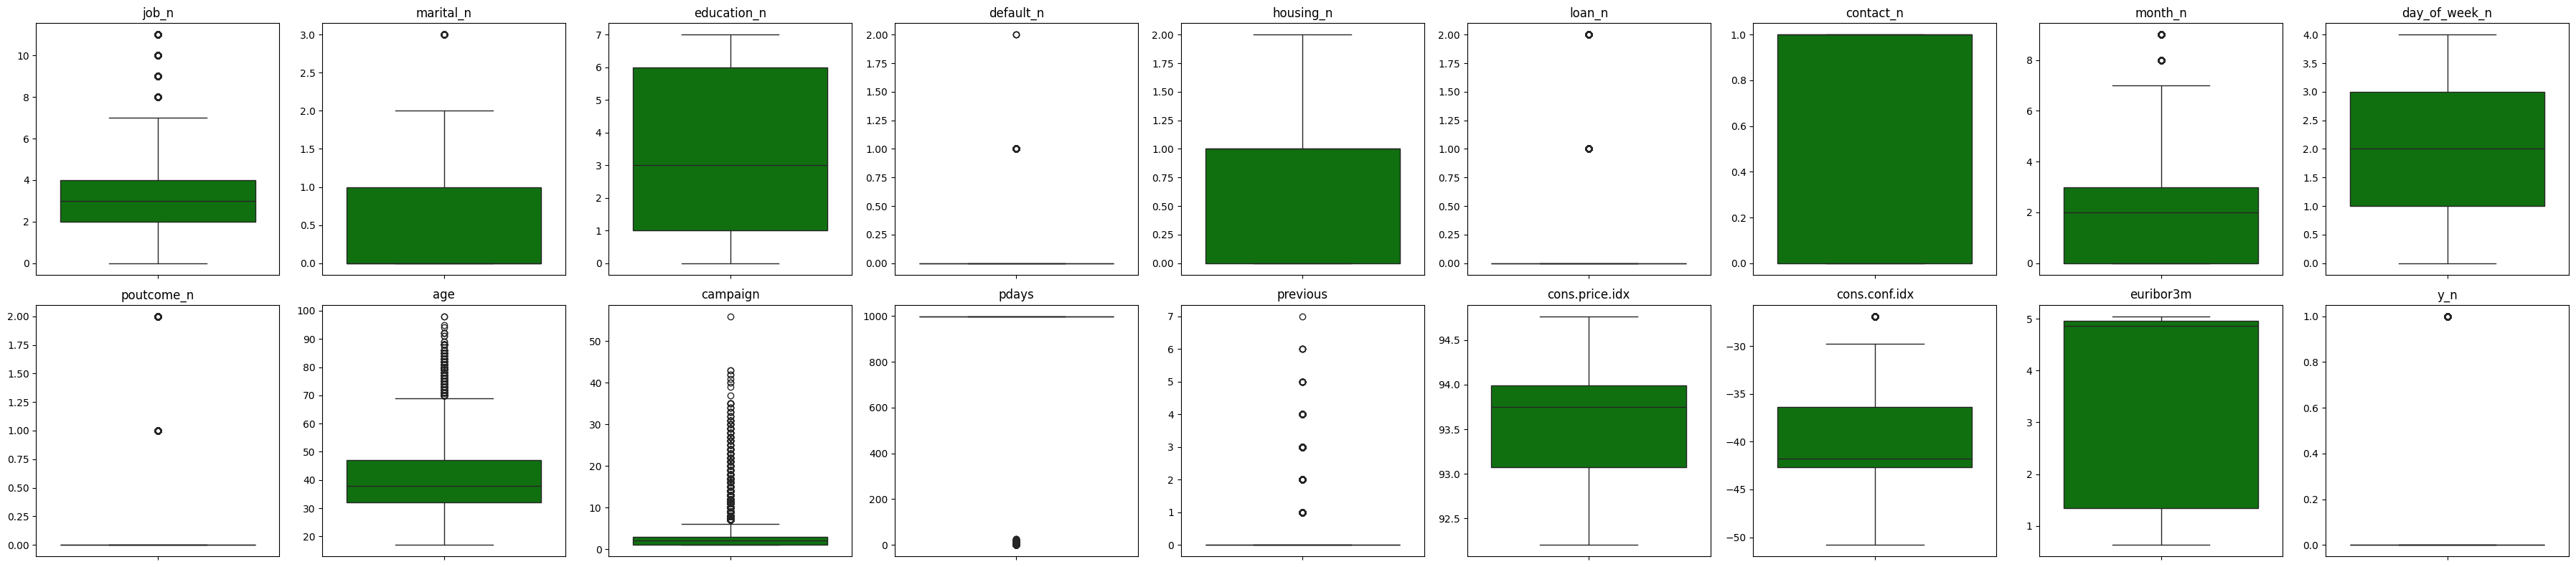

In [ ]:
fig, axis = plt.subplots(2, 9, figsize=(36, 8))
axis = axis.flatten() 

for i, col in enumerate(columnas_finales):
    sns.boxplot(data=total_data, y=col, ax=axis[i],color="green")
    axis[i].set_title(col)
    axis[i].set_xlabel("")
    axis[i].set_ylabel("")

for j in range(len(columnas_finales), len(axis)):
    fig.delaxes(axis[j])
    
plt.tight_layout()
plt.show()



- Por lo visto en los graficos anteriores decidimos transformar los outliers de las variables "age","campaign","previous","euribor3m","cons.price.idx","cons.conf.idx"
- la variable "pdays" a pesar de "mostrar" un desbalance en los datos preferimos modificarla por un dato mas normalizado en lugar de limpiar el codigo 999

In [ ]:
for col in columnas_finales:
    stats = total_data[col].describe()
    
    q1 = stats["25%"]
    q3 = stats["75%"]
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr

    print(f"Los limitires superiores e inferiores de {col} para encontrar outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(iqr, 2)}")

Los limitires superiores e inferiores de job_n para encontrar outliers son 7.0 y -1.0, con un rango intercuartílico de 2.0
Los limitires superiores e inferiores de marital_n para encontrar outliers son 2.5 y -1.5, con un rango intercuartílico de 1.0
Los limitires superiores e inferiores de education_n para encontrar outliers son 13.5 y -6.5, con un rango intercuartílico de 5.0
Los limitires superiores e inferiores de default_n para encontrar outliers son 0.0 y 0.0, con un rango intercuartílico de 0.0
Los limitires superiores e inferiores de housing_n para encontrar outliers son 2.5 y -1.5, con un rango intercuartílico de 1.0
Los limitires superiores e inferiores de loan_n para encontrar outliers son 0.0 y 0.0, con un rango intercuartílico de 0.0
Los limitires superiores e inferiores de contact_n para encontrar outliers son 2.5 y -1.5, con un rango intercuartílico de 1.0
Los limitires superiores e inferiores de month_n para encontrar outliers son 7.5 y -4.5, con un rango intercuartílico

In [ ]:
total_data = total_data.copy()
total_data.loc[:, "pdays_contacted"] = (total_data["pdays"] != 999).astype(int)
total_data_CON_outliers = total_data.copy()
total_data_SIN_outliers = total_data.copy() # Lo vamos a modificar. Para cada variable con outliers, reemplazamos sus valores outliers

outliers_cols = ["age","campaign","previous","euribor3m","cons.price.idx","cons.conf.idx"]

def replace_outliers(column, df):
    stats = df[column].describe()
    iqr = stats["75%"] - stats["25%"]
    
    upper = stats["75%"] + 1.5 * iqr
    lower = stats["25%"] - 1.5 * iqr

    # Evitar límites negativos si la variable no puede ser negativa
    if lower < 0:
        lower = df[column].min()

    # Winsorization vectorizada (rápida)
    df[column] = df[column].clip(lower, upper)

    return df.copy(), [int(round(lower, 2)), int(round(upper, 2))]


outliers_dict = {}
for column in outliers_cols:
    total_data_SIN_outliers, limits = replace_outliers(column, total_data_SIN_outliers)
    outliers_dict[column] = limits

outliers_dict

{'age': [9, 69],
 'campaign': [1, 6],
 'previous': [0, 0],
 'euribor3m': [0, 10],
 'cons.price.idx': [91, 95],
 'cons.conf.idx': [-50, -26]}

In [ ]:
#Guardamos los outliners

with open("/workspaces/Marcos-J-Gomes_machine-learning-python-template_2/data/processed/outliers_dict.json", "w") as f:
  json.dump(outliers_dict, f)

In [ ]:
total_data_CON_outliers.isnull().sum().sort_values(ascending=False)

job_n              0
marital_n          0
education_n        0
default_n          0
housing_n          0
loan_n             0
contact_n          0
month_n            0
day_of_week_n      0
poutcome_n         0
age                0
campaign           0
pdays              0
previous           0
cons.price.idx     0
cons.conf.idx      0
euribor3m          0
y_n                0
pdays_contacted    0
dtype: int64

In [ ]:
total_data_SIN_outliers.isnull().sum().sort_values(ascending=False)

job_n              0
marital_n          0
education_n        0
default_n          0
housing_n          0
loan_n             0
contact_n          0
month_n            0
day_of_week_n      0
poutcome_n         0
age                0
campaign           0
pdays              0
previous           0
cons.price.idx     0
cons.conf.idx      0
euribor3m          0
y_n                0
pdays_contacted    0
dtype: int64

# FEATURING SCALING

In [ ]:
predictoras = ["job_n", "marital_n", "education_n", "default_n", "housing_n", "loan_n", "contact_n", "month_n", "day_of_week_n", "poutcome_n", "age", "campaign", "pdays_contacted", "previous", "cons.price.idx", "cons.conf.idx", "euribor3m"]
target= "y_n"

X_CON = total_data_CON_outliers.drop(target, axis = 1)[predictoras]
X_SIN = total_data_SIN_outliers.drop(target, axis = 1)[predictoras]
y = total_data_CON_outliers[target]

X_train_CON_outliers, X_test_CON_outliers, y_train, y_test = train_test_split(X_CON, y, test_size = 0.2, random_state = 10)
X_train_SIN_outliers, X_test_SIN_outliers = train_test_split(X_SIN, test_size = 0.2, random_state = 10)

In [ ]:
# TENGO QUE GUARDARME TRES SITUACIONES: 1) DATASET SIN TOCAR, 2) DATASET NORMALIZADO, 3) DATASET MIN-MAX

## NORMALIZACIÓN (ESTANDARIZACIÓN)

### CON OUTLIERS
norm_CON_outliers = StandardScaler()
norm_CON_outliers.fit(X_train_CON_outliers)

X_train_CON_outliers_norm = norm_CON_outliers.transform(X_train_CON_outliers)
X_train_CON_outliers_norm = pd.DataFrame(X_train_CON_outliers_norm, index = X_train_CON_outliers.index, columns = predictoras)

X_test_CON_outliers_norm = norm_CON_outliers.transform(X_test_CON_outliers)
X_test_CON_outliers_norm = pd.DataFrame(X_test_CON_outliers_norm, index = X_test_CON_outliers.index, columns = predictoras)

### SIN OUTLIERS
norm_SIN_outliers = StandardScaler()
norm_SIN_outliers.fit(X_train_SIN_outliers)

X_train_SIN_outliers_norm = norm_SIN_outliers.transform(X_train_SIN_outliers)
X_train_SIN_outliers_norm = pd.DataFrame(X_train_SIN_outliers_norm, index = X_train_SIN_outliers.index, columns = predictoras)

X_test_SIN_outliers_norm = norm_SIN_outliers.transform(X_test_SIN_outliers)
X_test_SIN_outliers_norm = pd.DataFrame(X_test_SIN_outliers_norm, index = X_test_SIN_outliers.index, columns = predictoras)


## ESCALADO MIN-MAX (MINMAXIMIZACIÓN)

### CON OUTLIERS
scaler_CON_outliers = MinMaxScaler()
scaler_CON_outliers.fit(X_train_CON_outliers)

X_train_CON_outliers_scal = scaler_CON_outliers.transform(X_train_CON_outliers)
X_train_CON_outliers_scal = pd.DataFrame(X_train_CON_outliers_scal, index = X_train_CON_outliers.index, columns = predictoras)

X_test_CON_outliers_scal = scaler_CON_outliers.transform(X_test_CON_outliers)
X_test_CON_outliers_scal = pd.DataFrame(X_test_CON_outliers_scal, index = X_test_CON_outliers.index, columns = predictoras)

### SIN OUTLIERS
scaler_SIN_outliers = MinMaxScaler()
scaler_SIN_outliers.fit(X_train_SIN_outliers)

X_train_SIN_outliers_scal = scaler_SIN_outliers.transform(X_train_SIN_outliers)
X_train_SIN_outliers_scal = pd.DataFrame(X_train_SIN_outliers_scal, index = X_train_SIN_outliers.index, columns = predictoras)

X_test_SIN_outliers_scal = scaler_SIN_outliers.transform(X_test_SIN_outliers)
X_test_SIN_outliers_scal = pd.DataFrame(X_test_SIN_outliers_scal, index = X_test_SIN_outliers.index, columns = predictoras)

In [ ]:
# Guardamos TODOS los datasets generados

X_train_CON_outliers.to_excel("/workspaces/Marcos-J-Gomes_machine-learning-python-template_2/data/processed/X_train_CON_outliers.xlsx", index = False)
X_train_CON_outliers_norm.to_excel("/workspaces/Marcos-J-Gomes_machine-learning-python-template_2/data/processed/X_train_CON_outliers_norm.xlsx", index = False)
X_train_CON_outliers_scal.to_excel("/workspaces/Marcos-J-Gomes_machine-learning-python-template_2/data/processed/X_train_CON_outliers_scal.xlsx", index = False)
X_train_SIN_outliers.to_excel("/workspaces/Marcos-J-Gomes_machine-learning-python-template_2/data/processed/X_train_SIN_outliers.xlsx", index = False)
X_train_SIN_outliers_norm.to_excel("/workspaces/Marcos-J-Gomes_machine-learning-python-template_2/data/processed/X_train_SIN_outliers_norm.xlsx", index = False)
X_train_SIN_outliers_scal.to_excel("/workspaces/Marcos-J-Gomes_machine-learning-python-template_2/data/processed/X_train_SIN_outliers_scal.xlsx", index = False)

X_test_CON_outliers.to_excel("/workspaces/Marcos-J-Gomes_machine-learning-python-template_2/data/processed/X_test_CON_outliers.xlsx", index = False)
X_test_CON_outliers_norm.to_excel("/workspaces/Marcos-J-Gomes_machine-learning-python-template_2/data/processed/X_test_CON_outliers_norm.xlsx", index = False)
X_test_CON_outliers_scal.to_excel("/workspaces/Marcos-J-Gomes_machine-learning-python-template_2/data/processed/X_test_CON_outliers_scal.xlsx", index = False)
X_test_SIN_outliers.to_excel("/workspaces/Marcos-J-Gomes_machine-learning-python-template_2/data/processed/X_test_SIN_outliers.xlsx", index = False)
X_test_SIN_outliers_norm.to_excel("/workspaces/Marcos-J-Gomes_machine-learning-python-template_2/data/processed/X_test_SIN_outliers_norm.xlsx", index = False)
X_test_SIN_outliers_scal.to_excel("/workspaces/Marcos-J-Gomes_machine-learning-python-template_2/data/processed/X_test_SIN_outliers_scal.xlsx", index = False)

y_train.to_excel("/workspaces/Marcos-J-Gomes_machine-learning-python-template_2/data/processed/y_train.xlsx", index = False)
y_test.to_excel("/workspaces/Marcos-J-Gomes_machine-learning-python-template_2/data/processed/y_test.xlsx", index = False)

# SCALERs
with open("/workspaces/Marcos-J-Gomes_machine-learning-python-template_2/models/norm_CON_outliers.pkl", "wb") as file:
  pickle.dump(norm_CON_outliers, file)
with open("/workspaces/Marcos-J-Gomes_machine-learning-python-template_2/models/norm_SIN_outliers.pkl", "wb") as file:
  pickle.dump(norm_SIN_outliers, file)
with open("/workspaces/Marcos-J-Gomes_machine-learning-python-template_2/models/scaler_CON_outliers.pkl", "wb") as file:
  pickle.dump(scaler_CON_outliers, file)
with open("/workspaces/Marcos-J-Gomes_machine-learning-python-template_2/models/scaler_SIN_outliers.pkl", "wb") as file:
  pickle.dump(scaler_SIN_outliers, file)

# FEATURE SELECTION
SELECCION DE CARACTERISTICAS

Seleccion con Outliers

In [ ]:
X_train = X_train_CON_outliers.copy()
X_test = X_test_CON_outliers.copy()

# Con un valor de k = 5 decimos que seleccionamos 5 caracteristicas
selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(X_train, y_train)

ix = selection_model.get_support()
X_train_sel_CON_outliers = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel_CON_outliers = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

print(X_train_sel_CON_outliers.head()) 
print(X_test_sel_CON_outliers.head()) 

   month_n  poutcome_n  pdays_contacted  previous  euribor3m
0      1.0         2.0              1.0       1.0      1.260
1      0.0         0.0              0.0       0.0      1.299
2      0.0         0.0              0.0       0.0      4.857
3      3.0         2.0              1.0       1.0      0.903
4      1.0         0.0              0.0       0.0      4.958
   month_n  poutcome_n  pdays_contacted  previous  euribor3m
0      3.0         0.0              0.0       0.0      4.964
1      0.0         0.0              0.0       0.0      4.859
2      8.0         0.0              0.0       0.0      1.405
3      0.0         0.0              0.0       0.0      1.299
4      1.0         0.0              0.0       0.0      4.960


In [ ]:
X_train_sel_CON_outliers[target] = list(y_train)
X_test_sel_CON_outliers[target] = list(y_test)
X_train_sel_CON_outliers.to_csv("/workspaces/Marcos-J-Gomes_machine-learning-python-template_2/data/processed/X_train_sel_CON_outliers_clean.csv", index = False)
X_test_sel_CON_outliers.to_csv("/workspaces/Marcos-J-Gomes_machine-learning-python-template_2/data/processed/X_test_sel_CON_outliers_clean.csv", index = False)

In [ ]:
X_train = X_train_CON_outliers_norm.copy()
X_test = X_test_CON_outliers_norm.copy()

# Con un valor de k = 5 decimos que seleccionamos 5 caracteristicas
selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(X_train, y_train)

ix = selection_model.get_support()
X_train_sel_CON_outliers_norm = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel_CON_outliers_norm = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

print(X_train_sel_CON_outliers_norm.head()) 
print(X_test_sel_CON_outliers_norm.head()) 

    month_n  poutcome_n  pdays_contacted  previous  euribor3m
0 -0.513264    4.004103         5.088202  1.654628  -1.361240
1 -0.925025   -0.373651        -0.196533 -0.349175  -1.338751
2 -0.925025   -0.373651        -0.196533 -0.349175   0.712953
3  0.310258    4.004103         5.088202  1.654628  -1.567103
4 -0.513264   -0.373651        -0.196533 -0.349175   0.771195
    month_n  poutcome_n  pdays_contacted  previous  euribor3m
0  0.310258   -0.373651        -0.196533 -0.349175   0.774655
1 -0.925025   -0.373651        -0.196533 -0.349175   0.714107
2  2.369063   -0.373651        -0.196533 -0.349175  -1.277627
3 -0.925025   -0.373651        -0.196533 -0.349175  -1.338751
4 -0.513264   -0.373651        -0.196533 -0.349175   0.772348


In [ ]:
X_train_sel_CON_outliers_norm[target] = list(y_train)
X_test_sel_CON_outliers_norm[target] = list(y_test)
X_train_sel_CON_outliers_norm.to_csv("/workspaces/Marcos-J-Gomes_machine-learning-python-template_2/data/processed/X_train_sel_CON_outliers_norm_clean.csv", index = False)
X_test_sel_CON_outliers_norm.to_csv("/workspaces/Marcos-J-Gomes_machine-learning-python-template_2/data/processed/X_test_sel_CON_outliers_norm_clean.csv", index = False)

In [ ]:
X_train = X_train_CON_outliers_scal.copy()
X_test = X_test_CON_outliers_scal.copy()

# Con un valor de k = 5 decimos que seleccionamos 5 caracteristicas
selection_model = SelectKBest(chi2, k = 5)
selection_model.fit(X_train, y_train)

ix = selection_model.get_support()
X_train_sel_CON_outliers_scal = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel_CON_outliers_scal = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

print(X_train_sel_CON_outliers_scal.head())  
print(X_test_sel_CON_outliers_scal.head()) 

    month_n  poutcome_n  pdays_contacted  previous  euribor3m
0  0.111111         1.0              1.0  0.142857   0.141918
1  0.000000         0.0              0.0  0.000000   0.150759
2  0.000000         0.0              0.0  0.000000   0.957379
3  0.333333         1.0              1.0  0.142857   0.060984
4  0.111111         0.0              0.0  0.000000   0.980277
    month_n  poutcome_n  pdays_contacted  previous  euribor3m
0  0.333333         0.0              0.0       0.0   0.981637
1  0.000000         0.0              0.0       0.0   0.957833
2  0.888889         0.0              0.0       0.0   0.174790
3  0.000000         0.0              0.0       0.0   0.150759
4  0.111111         0.0              0.0       0.0   0.980730


In [ ]:
X_train_sel_CON_outliers_scal[target] = list(y_train)
X_test_sel_CON_outliers_scal[target] = list(y_test)
X_train_sel_CON_outliers_scal.to_csv("/workspaces/Marcos-J-Gomes_machine-learning-python-template_2/data/processed/X_train_sel_CON_outliers_scal_clean.csv", index = False)
X_test_sel_CON_outliers_scal.to_csv("/workspaces/Marcos-J-Gomes_machine-learning-python-template_2/data/processed/X_test_sel_CON_outliers_scal_clean.csv", index = False)

Seleccion sin Ouliers

In [ ]:
X_train = X_train_SIN_outliers.copy()
X_test = X_test_SIN_outliers.copy()

# Con un valor de k = 5 decimos que seleccionamos 5 caracteristicas
selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(X_train, y_train)

ix = selection_model.get_support()
X_train_sel_SIN_outliers = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel_SIN_outliers = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

print(X_train_sel_SIN_outliers.head())
print(X_test_sel_SIN_outliers.head()) 

   contact_n  month_n  poutcome_n  pdays_contacted  euribor3m
0        1.0      1.0         2.0              1.0      1.260
1        1.0      0.0         0.0              0.0      1.299
2        0.0      0.0         0.0              0.0      4.857
3        1.0      3.0         2.0              1.0      0.903
4        0.0      1.0         0.0              0.0      4.958
   contact_n  month_n  poutcome_n  pdays_contacted  euribor3m
0        1.0      3.0         0.0              0.0      4.964
1        0.0      0.0         0.0              0.0      4.859
2        1.0      8.0         0.0              0.0      1.405
3        1.0      0.0         0.0              0.0      1.299
4        0.0      1.0         0.0              0.0      4.960


/home/vscode/.local/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [ ]:
X_train_sel_SIN_outliers[target] = list(y_train)
X_test_sel_SIN_outliers[target] = list(y_test)
X_train_sel_SIN_outliers.to_csv("/workspaces/Marcos-J-Gomes_machine-learning-python-template_2/data/processed/X_train_sel_SIN_outliers_clean.csv", index = False)
X_test_sel_SIN_outliers.to_csv("/workspaces/Marcos-J-Gomes_machine-learning-python-template_2/data/processed/X_test_sel_SIN_outliers_clean.csv", index = False)

In [ ]:
X_train = X_train_SIN_outliers_norm.copy()
X_test = X_test_SIN_outliers_norm.copy()

# Con un valor de k = 5 decimos que seleccionamos 5 caracteristicas
selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(X_train, y_train)

ix = selection_model.get_support()
X_train_sel_SIN_outliers_norm = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel_SIN_outliers_norm = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

print(X_train_sel_SIN_outliers_norm.head()) 
print(X_test_sel_SIN_outliers_norm.head()) 

   contact_n   month_n  poutcome_n  pdays_contacted  euribor3m
0   0.759842 -0.513264    4.004103         5.088202  -1.361240
1   0.759842 -0.925025   -0.373651        -0.196533  -1.338751
2  -1.316063 -0.925025   -0.373651        -0.196533   0.712953
3   0.759842  0.310258    4.004103         5.088202  -1.567103
4  -1.316063 -0.513264   -0.373651        -0.196533   0.771195
   contact_n   month_n  poutcome_n  pdays_contacted  euribor3m
0   0.759842  0.310258   -0.373651        -0.196533   0.774655
1  -1.316063 -0.925025   -0.373651        -0.196533   0.714107
2   0.759842  2.369063   -0.373651        -0.196533  -1.277627
3   0.759842 -0.925025   -0.373651        -0.196533  -1.338751
4  -1.316063 -0.513264   -0.373651        -0.196533   0.772348


/home/vscode/.local/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [ ]:
X_train_sel_SIN_outliers_norm[target] = list(y_train)
X_test_sel_SIN_outliers_norm[target] = list(y_test)
X_train_sel_SIN_outliers_norm.to_csv("/workspaces/Marcos-J-Gomes_machine-learning-python-template_2/data/processed/X_train_sel_SIN_outliers_norm_clean.csv", index = False)
X_test_sel_SIN_outliers_norm.to_csv("/workspaces/Marcos-J-Gomes_machine-learning-python-template_2/data/processed/X_test_sel_SIN_outliers_norm_clean.csv", index = False)

In [ ]:
X_train = X_train_SIN_outliers_scal.copy()
X_test = X_test_SIN_outliers_scal.copy()

# Con un valor de k = 5 decimos que seleccionamos 5 caracteristicas
selection_model = SelectKBest(chi2, k = 5)
selection_model.fit(X_train, y_train)

ix = selection_model.get_support()
X_train_sel_SIN_outliers_scal = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel_SIN_outliers_scal = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

print(X_train_sel_SIN_outliers_scal.head())
print(X_test_sel_SIN_outliers_scal.head()) 

   contact_n   month_n  poutcome_n  pdays_contacted  euribor3m
0        1.0  0.111111         1.0              1.0   0.141918
1        1.0  0.000000         0.0              0.0   0.150759
2        0.0  0.000000         0.0              0.0   0.957379
3        1.0  0.333333         1.0              1.0   0.060984
4        0.0  0.111111         0.0              0.0   0.980277
   contact_n   month_n  poutcome_n  pdays_contacted  euribor3m
0        1.0  0.333333         0.0              0.0   0.981637
1        0.0  0.000000         0.0              0.0   0.957833
2        1.0  0.888889         0.0              0.0   0.174790
3        1.0  0.000000         0.0              0.0   0.150759
4        0.0  0.111111         0.0              0.0   0.980730


In [ ]:
X_train_sel_SIN_outliers_scal[target] = list(y_train)
X_test_sel_SIN_outliers_scal[target] = list(y_test)
X_train_sel_SIN_outliers_scal.to_csv("/workspaces/Marcos-J-Gomes_machine-learning-python-template_2/data/processed/X_train_sel_SIN_outliers_scal_clean.csv", index = False)
X_test_sel_SIN_outliers_scal.to_csv("/workspaces/Marcos-J-Gomes_machine-learning-python-template_2/data/processed/X_test_sel_SIN_outliers_scal_clean.csv", index = False)

# SELECCION MEJOR DATA SET

In [ ]:
datasets = {
    "CON_outliers": (X_train_sel_CON_outliers.drop(target, axis = 1), X_test_sel_CON_outliers.drop(target, axis = 1)),
    "CON_outliers_norm": (X_train_sel_CON_outliers_norm.drop(target, axis = 1), X_test_sel_CON_outliers_norm.drop(target, axis = 1)),
    "CON_outliers_scal": (X_train_sel_CON_outliers_scal.drop(target, axis = 1), X_test_sel_CON_outliers_scal.drop(target, axis = 1)),

    "SIN_outliers": (X_train_sel_SIN_outliers.drop(target, axis = 1), X_test_sel_SIN_outliers.drop(target, axis = 1)),
    "SIN_outliers_norm": (X_train_sel_SIN_outliers_norm.drop(target, axis = 1), X_test_sel_SIN_outliers_norm.drop(target, axis = 1)),
    "SIN_outliers_scal": (X_train_sel_SIN_outliers_scal.drop(target, axis = 1), X_test_sel_SIN_outliers_scal.drop(target, axis = 1))
}

Resultados = {}

for dataset_, (X_train, X_test) in datasets.items():
    model = LogisticRegression(random_state=10)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    metrica = accuracy_score(y_test, y_pred)

    Resultados[dataset_] = metrica


mejor_dataset = max(Resultados, key=Resultados.get)
mejor_metrica = Resultados[mejor_dataset]

print("Resultados por dataset:")
for k, v in Resultados.items():
    print(f"{k:25s} -> Accuracy: {v:.4f}")

print("Mejor dataset:", mejor_dataset)
print("Mejor accuracy:", mejor_metrica)

Resultados por dataset:
CON_outliers              -> Accuracy: 0.9025
CON_outliers_norm         -> Accuracy: 0.9025
CON_outliers_scal         -> Accuracy: 0.9025
SIN_outliers              -> Accuracy: 0.9025
SIN_outliers_norm         -> Accuracy: 0.9025
SIN_outliers_scal         -> Accuracy: 0.9025
Mejor dataset: CON_outliers
Mejor accuracy: 0.9025012141816415


# OPTIMIZACION DE MODELO

Metodo Grid

In [ ]:
hyperparams = {
    "penalty": ["l1", "l2"],
    "C": [0.01, 0.1, 1, 10, 100],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

grid = GridSearchCV(LogisticRegression(random_state=10), hyperparams, scoring = "accuracy", cv =10)

In [ ]:
grid.fit(X_train_sel_CON_outliers.drop([target], axis = 1), y_train) # Entreno el optimizador con el dataset GANADOR
print(f"Los mejores hyper parametros son {grid.best_params_}")
best_model_random = grid.best_estimator_

Los mejores hyper parametros son {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
model_G = LogisticRegression(C = 0.01, penalty = "l1", solver = "liblinear")
model_G.fit(X_train_sel_CON_outliers.drop([target], axis = 1), y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'l1'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",0.01
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multiclass

In [ ]:
y_pred_grid = model_G.predict(X_test_sel_CON_outliers.drop([target], axis = 1))
y_pred_grid

array([0, 0, 0, ..., 0, 0, 0], shape=(8236,))

In [ ]:
accuracy_score(y_test, y_pred_grid)

0.9039582321515298

In [ ]:
dump(model_G, open("../models/Grid_logistic_regression_C-0.1_penalty-l1_solver-liblinear_42.sav", "wb"))

Metodo Ramdom

In [ ]:
random = RandomizedSearchCV(LogisticRegression(random_state=10), hyperparams, scoring = "accuracy", n_iter = 10)
random.fit(X_train_sel_CON_outliers.drop([target], axis = 1), y_train) # Entreno el optimizador con el dataset GANADOR
print(f"Los mejores hyper parametros son {random.best_params_}")
best_model_random = random.best_estimator_

Los mejores hyper parametros son {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.01}


In [ ]:
model_R=LogisticRegression(solver="liblinear", penalty="l1", C=0.01)
model_R.fit(X_train_sel_CON_outliers.drop([target], axis = 1), y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'l1'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",0.01
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multiclass

In [ ]:
y_pred_random = model_R.predict(X_test_sel_CON_outliers.drop([target], axis = 1))
y_pred_random

array([0, 0, 0, ..., 0, 0, 0], shape=(8236,))

In [ ]:
accuracy_score(y_test, y_pred_random)

0.9039582321515298

In [ ]:
dump(model_R, open("../models/Random_logistic_regression_C-0.1_penalty-l1_solver-liblinear.sav", "wb"))